In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

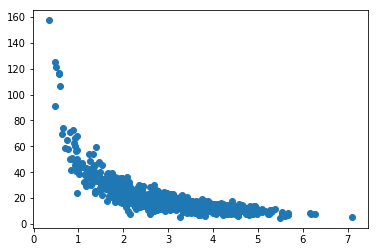

In [2]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds
plt.scatter(pageSpeeds, purchaseAmount)

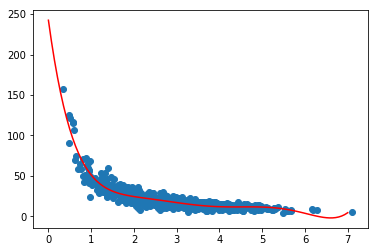

In [3]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)
p4 = np.poly1d(np.polyfit(x, y, 6))
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [4]:
r2 = r2_score(y, p4(x))
r2

0.8700733999871757

## Multivariate Regression

In [5]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [7]:
# used to create numbered codes from text based categories
df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors' ]]
y = df[['Price']]

In [8]:
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.98e-07
Time:                        08:45:47   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000    2.77e+04    3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000      -0.259      -0.095
Model_ord    -39.0387     39.326     -0.993      0.321    -116.234      38.157
Doors      -1652.9303    402.649     -4.105      0.000   -2443.303    -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""